# NLP Visualizations of Macbeth and Romeo and Juliet

Execute the following cell for important imports.

In [11]:
import requests
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

Execute the following cell to get the text of "Macbeth" and "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/)

In [12]:
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
macbeth_string = response.text
macbeth_string = macbeth_string.split('*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[1]
macbeth_string = macbeth_string.split('*** END OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[0]
macbeth_string = macbeth_string.lower()

target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK 1513 ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK 1513 ***')[0]
r_j_scenes = [i.lower() for i in r_j_string.split('SCENE')[1:]]

You now have the following variables:
* `macbeth_string`: this string contains the full text of "Macbeth"
* `r_j_string`: this string contains the full text of "Romeo and Juliet"
* `r_j_scenes`: the text from each scene of "Romeo and Juliet" is included in this Python list, with one scene per list item

Make two new variables:
* a Python list of stopwords
* a variable for using VADER's SentimentIntensityAnalyzer

In [81]:
stop_words = stopwords.words('english') # list of stopwords

sia = vader.SentimentIntensityAnalyzer()

## Macbeth

Make a list of the words in Macbeth by tokenizing `macbeth_string`:

In [20]:
macbeth_words = word_tokenize(macbeth_string)

['cover', 'macbeth', 'by', 'william', 'shakespeare', 'contents', 'act', 'i', 'scene', 'i.', 'an', 'open', 'place', '.', 'scene', 'ii', '.', 'a', 'camp', 'near', 'forres', '.', 'scene', 'iii', '.', 'a', 'heath', '.', 'scene', 'iv', '.', 'forres', '.', 'a', 'room', 'in', 'the', 'palace', '.', 'scene', 'v.', 'inverness', '.', 'a', 'room', 'in', 'macbethâ\x80\x99s', 'castle', '.', 'scene', 'vi', '.', 'the', 'same', '.', 'before', 'the', 'castle', '.', 'scene', 'vii', '.', 'the', 'same', '.', 'a', 'lobby', 'in', 'the', 'castle', '.', 'act', 'ii', 'scene', 'i.', 'inverness', '.', 'court', 'within', 'the', 'castle', '.', 'scene', 'ii', '.', 'the', 'same', '.', 'scene', 'iii', '.', 'the', 'same', '.', 'scene', 'iv', '.', 'the', 'same', '.', 'without', 'the', 'castle', '.', 'act', 'iii', 'scene', 'i.', 'forres', '.', 'a', 'room', 'in', 'the', 'palace', '.', 'scene', 'ii', '.', 'the', 'same', '.', 'another', 'room', 'in', 'the', 'palace', '.', 'scene', 'iii', '.', 'the', 'same', '.', 'a', 'park'

Next, make a list of positive words and a list of negative words using the `polarity_scores` method of VADER's SentimentIntensityAnalyzer.  To do this:
* Write a for loop that iterates over your Macbeth word list
  * If the compound score of a word is positive, add the word to the positive-word list
  * If the compound score of a word is negative, add the word to the negative-word list
  * If the compound score is 0, the word should not be added to either list

In [22]:
macbeth_positive_words = []
macbeth_negative_words = []

for word in macbeth_words:
  score = sia.polarity_scores(word)['compound']
  if score > 0:
    macbeth_positive_words.append(word)
  elif score < 0:
    macbeth_negative_words.append(word)

1. Find the 15 most common negative words in Macbeth and the 15 most common positive words
    * Note that if you have a list variable called `mylist`, you can get the frequencies of words in `mylist` by using `nltk.FreqDist(mylist)`, and you can get the `n` most common words with `nltk.FreqDist(mylist).most_common(n)`.
2. Make a horizontal bar plot similar to the plots in the following image
3. Comment on similarities and differences to the Macbeth plot below

(Plot taken from a [2018 post by Peer Chirstensen](https://web.archive.org/web/20230129014418/https://peerchristensen.netlify.app/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/))

![image.png](attachment:image.png)

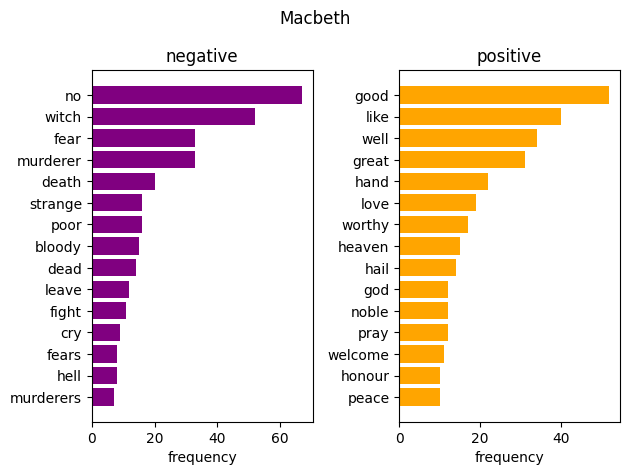

In [70]:
# Find 15 most common negative and positive words
macbeth_common_pos_words = []
macbeth_common_pos_words_freq = []

macbeth_common_neg_words = []
macbeth_common_neg_words_freq = []

for (word, freq) in reversed(nltk.FreqDist(macbeth_positive_words).most_common(15)):
  macbeth_common_pos_words.append(word)
  macbeth_common_pos_words_freq.append(freq)

for (word, freq) in reversed(nltk.FreqDist(macbeth_negative_words).most_common(15)):
  macbeth_common_neg_words.append(word)
  macbeth_common_neg_words_freq.append(freq)

# Make horizontal bar plots
figure, axis = plt.subplots(1, 2)

axis[1].barh(macbeth_common_pos_words, macbeth_common_pos_words_freq, color="orange")
axis[1].set_title("positive")
axis[1].set_xlabel("frequency")

axis[0].barh(macbeth_common_neg_words, macbeth_common_neg_words_freq, color="purple")
axis[0].set_title("negative")
axis[0].set_xlabel("frequency")

plt.suptitle("Macbeth")

plt.tight_layout()

**My comments:**

Similar to the plot generated by Peter Chirstensen, we have a decent number of words in common for each respective plot, such as "fear", "murderer", and "death in the negative plot, and "good", "like", and "well" in the posiive plot.

However, although our plot shows the top 15 rather than top 10 words, our plots still have a few other words that are listed with high frequencies that were not in Chirstensen's plots, such as "no" and "witch" in the negative plot and "hand" and "god" in the positive plot. The plots have some out of order words in terms of frequency.

The word list we created from Macbeth did not have the stopwords removed.
* Repeat the above analysis, but do so for a list of Macbeth words in which the stopwords have been removed.
* What changes?

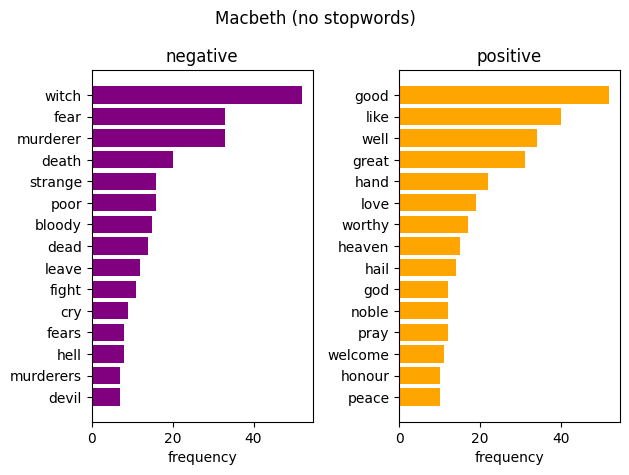

In [83]:
no_stopwords_macbeth_positive_words = []
no_stopwords_macbeth_negative_words = []

for word in macbeth_words:
  if word not in stop_words: # check that word isn't a stopword
    score = sia.polarity_scores(word)['compound']
    if score > 0:
      no_stopwords_macbeth_positive_words.append(word)
    elif score < 0:
      no_stopwords_macbeth_negative_words.append(word)

# Find 15 most common negative and positive words
no_stopwords_macbeth_common_pos_words = []
no_stopwords_macbeth_common_pos_words_freq = []

no_stopwords_macbeth_common_neg_words = []
no_stopwords_macbeth_common_neg_words_freq = []

for (word, freq) in reversed(nltk.FreqDist(no_stopwords_macbeth_positive_words).most_common(15)):
  no_stopwords_macbeth_common_pos_words.append(word)
  no_stopwords_macbeth_common_pos_words_freq.append(freq)

for (word, freq) in reversed(nltk.FreqDist(no_stopwords_macbeth_negative_words).most_common(15)):
  no_stopwords_macbeth_common_neg_words.append(word)
  no_stopwords_macbeth_common_neg_words_freq.append(freq)

# Make horizontal bar plots
figure, axis = plt.subplots(1, 2)

axis[1].barh(no_stopwords_macbeth_common_pos_words, no_stopwords_macbeth_common_pos_words_freq, color="orange")
axis[1].set_title("positive")
axis[1].set_xlabel("frequency")

axis[0].barh(no_stopwords_macbeth_common_neg_words, no_stopwords_macbeth_common_neg_words_freq, color="purple")
axis[0].set_title("negative")
axis[0].set_xlabel("frequency")

plt.suptitle("Macbeth (no stopwords)")

plt.tight_layout()

**My comments:**

After removing the stopwords, the only noticable change from my plots is that the word "no", which was at the top of the negative plot, is now removed. However, there still remain differences between my plot and the plot created by Christensen.

* Repeat the above analysis one more time -> in addition to removing the stopwords, use the Porter stemmer to get a list of stemmed words before you calculate the word frequencies.
* What words in your plot have now been counted together?

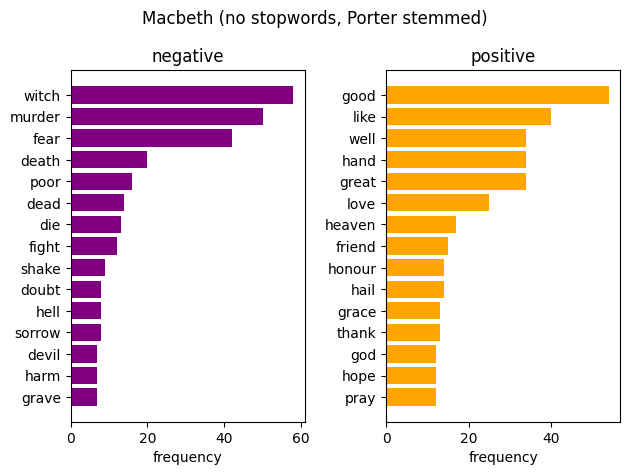

In [84]:
no_stopwords_macbeth_positive_words = []
no_stopwords_macbeth_negative_words = []

for word in macbeth_words:
  if word not in stop_words: # check that word isn't a stopword
    porter_stem_word = PorterStemmer().stem(word)
    score = sia.polarity_scores(porter_stem_word)['compound']
    if score > 0:
      no_stopwords_macbeth_positive_words.append(porter_stem_word)
    elif score < 0:
      no_stopwords_macbeth_negative_words.append(porter_stem_word)

# Find 15 most common negative and positive words
no_stopwords_macbeth_common_pos_words = []
no_stopwords_macbeth_common_pos_words_freq = []

no_stopwords_macbeth_common_neg_words = []
no_stopwords_macbeth_common_neg_words_freq = []

for (word, freq) in reversed(nltk.FreqDist(no_stopwords_macbeth_positive_words).most_common(15)):
  no_stopwords_macbeth_common_pos_words.append(word)
  no_stopwords_macbeth_common_pos_words_freq.append(freq)

for (word, freq) in reversed(nltk.FreqDist(no_stopwords_macbeth_negative_words).most_common(15)):
  no_stopwords_macbeth_common_neg_words.append(word)
  no_stopwords_macbeth_common_neg_words_freq.append(freq)

# Make horizontal bar plots
figure, axis = plt.subplots(1, 2)

axis[1].barh(no_stopwords_macbeth_common_pos_words, no_stopwords_macbeth_common_pos_words_freq, color="orange")
axis[1].set_title("positive")
axis[1].set_xlabel("frequency")

axis[0].barh(no_stopwords_macbeth_common_neg_words, no_stopwords_macbeth_common_neg_words_freq, color="purple")
axis[0].set_title("negative")
axis[0].set_xlabel("frequency")

plt.suptitle("Macbeth (no stopwords, Porter stemmed)")

plt.tight_layout()

**My comments:**

After also stemming the words, the plot now has more conciseness. The words "murderer" and "murderers" have been counted together as simply "murder" in the negative plot and thus have a higher count.

## Romeo and Juliet

We are now going to plot the evolution of sentiment in Romeo and Juliet.

This is motivated by the following plot (also from the afore-mentioned link):

![image.png](attachment:image.png)

We are going to make a couple different plots.

First:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Sum the compound sentiment scores of every word in the scene (using VADER's SentimentIntensityAnalyser's polarity_scores method to get the compound sentiment score for each word).
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Comment on its resemblance to the Romeo and Juliet plot above.

Text(0.5, 1.0, 'Romeo and Juliet: Sentiment by Scene')

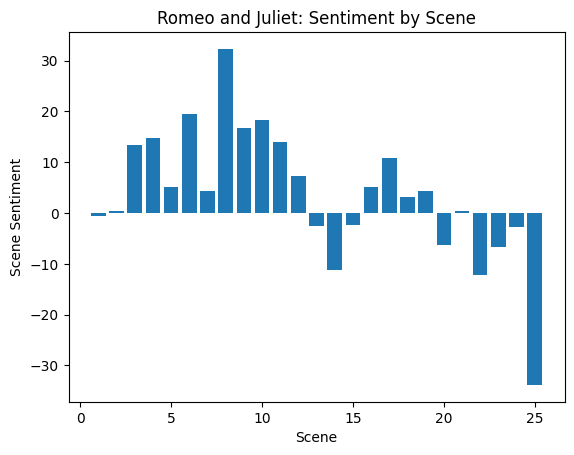

In [95]:
scene_sentiments = []

for scene in r_j_scenes:
  scene_words = word_tokenize(scene) # tokenize string
  scene_sentiment = 0
  for word in scene_words: # sum compound sentiment scores
    scene_sentiment += sia.polarity_scores(word)['compound']
  scene_sentiments.append(scene_sentiment)

scene_nums = range(1, len(scene_sentiments)+1)

# Make bar graph of scene sentiments
plt.bar(scene_nums, scene_sentiments)
plt.xlabel("Scene")
plt.ylabel("Scene Sentiment")
plt.title("Romeo and Juliet: Sentiment by Scene")

**My comments:**

Similar to the Romeo and Juliet plot made by Chirstensen, we can conclude that the play starts with a positive sentiment. However, about halfway through, there is a negative sentiment part, then a positive sentiment part, then finally ends with a negative sentiment.

However, the detail and extent of the sentiments vary between our plots, as my plot shows the first half to be completely positive, while Chirstensen's plot still depicts some negative sentiment in the first half. Also, the negative sentiment in the second half of the play have a greater magnitude than shown on my plot.

Second:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 to the score for each positive word (compound_score > 0) and substracting 1 from the score for each negative word (compound_score < 0)**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous method of calculating the total scene sentiment score?

Text(0.5, 1.0, 'Romeo and Juliet: Total Sentiment by Scene')

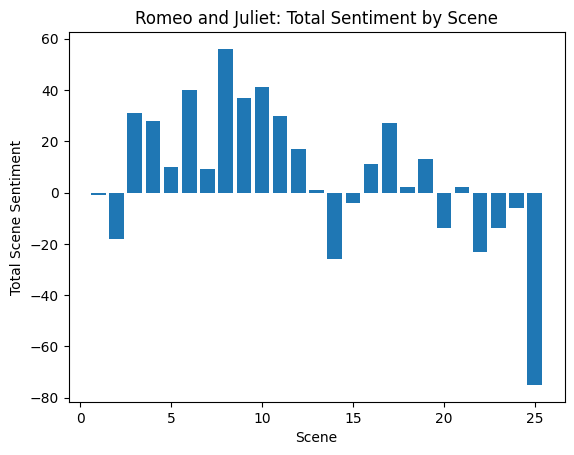

In [96]:
total_scene_sentiments = []

for scene in r_j_scenes:
  scene_words = word_tokenize(scene) # tokenize string
  scene_sentiment = 0
  for word in scene_words: # calculate total scene's sentiment scores
    score = sia.polarity_scores(word)['compound']
    if score > 0: # positive
      scene_sentiment += 1
    elif score < 0:
      scene_sentiment -= 1
  total_scene_sentiments.append(scene_sentiment)

scene_nums = range(1, len(total_scene_sentiments)+1)

# Make bar graph of scene sentiments
plt.bar(scene_nums, total_scene_sentiments)
plt.xlabel("Scene")
plt.ylabel("Total Scene Sentiment")
plt.title("Romeo and Juliet: Total Sentiment by Scene")

**My comments:**

Taking into account the total sentiment score by adding and subtracting 1 for positive and negative scores respectively, I notice a difference in my plot. Now, similar to Chirstensen's plot, my plot also displays the negative sentiment that the play begins with. Additionally, the magnitude of the sentiment scores for some scenes changed, being either greater or less in magnitude.

Next, we are going to use a new lexicon to assess positive and negative word sentiment, the opinion_lexicon (https://www.nltk.org/api/nltk.corpus.reader.opinion_lexicon.html)

Execute the following cell to make a set of positive words and a set of negative words.

In [97]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

The following cell is an example of checking whether a word is positive or negative according to this opinion lexicon.  Try it out with a couple words.

In [102]:
testword = 'poppy'
if testword in positive_words:
    print(testword + ' is positive')
elif testword in negative_words:
    print(testword + ' is negative')
else:
    print(testword + ' is neither positive nor negative')

# tested with words: love (p), great (p), hatred (n), dream (n), poppy (n)

poppy is neither positive nor negative


Third plot:

* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

Text(0.5, 1.0, 'Romeo and Juliet: Sentiment by Scene, Calculated from Opinion Lexicon')

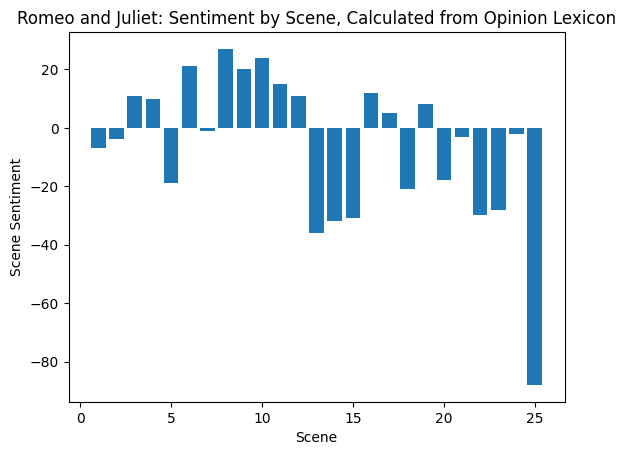

In [103]:
opinion_lexicon_scene_sentiments = []

for scene in r_j_scenes:
  scene_words = word_tokenize(scene) # tokenize string
  scene_sentiment = 0
  for word in scene_words: # calculate total scene's sentiment scores
    if word in positive_words: # positive
      scene_sentiment += 1
    elif word in negative_words:
      scene_sentiment -= 1
  opinion_lexicon_scene_sentiments.append(scene_sentiment)

scene_nums = range(1, len(opinion_lexicon_scene_sentiments)+1)

# Make bar graph of scene sentiments
plt.bar(scene_nums, opinion_lexicon_scene_sentiments)
plt.xlabel("Scene")
plt.ylabel("Scene Sentiment")
plt.title("Romeo and Juliet: Sentiment by Scene, Calculated from Opinion Lexicon")

My comments:

Yes, using the positive and negative words from opinion_lexicon, the plot changes once again to resemble even more like Chirstensen's plot. My plot now depicts more variation in positive and negative sentiment throughout the play. The plot also displays a stronger negative sentiment, while the positive sentiment has less strong of a magnitude. This may be due to the difference between using opinion_lexicon and calculating SIA polarity scores.

Fourth plot:

* Take the entire string of Romeo and Juliet (`r_j_string`) and tokenize it into words.
* Calculate a total sentiment score for each consecutive group of 500 words.
  * Do this as immediately above by adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.
* Make a bar plot that has the group number (0,1,2,3,...) on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

Text(0.5, 1.0, 'Romeo and Juliet: Sentiment by Groups of 500 Words')

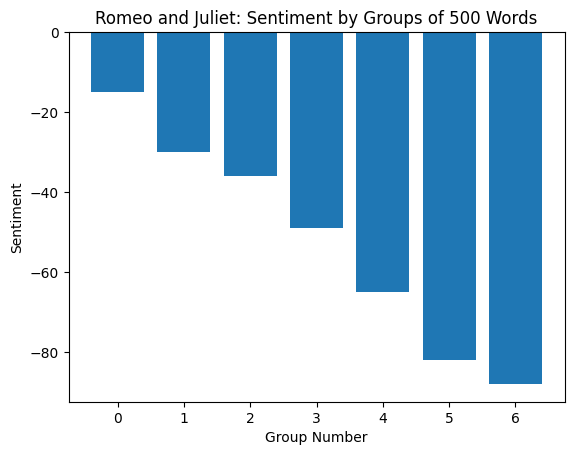

In [119]:
grouped_scene_sentiments = []
count = 0

r_j_words = word_tokenize(scene) # tokenize string
word_group_sentiment = 0
for n in range(0, int(len(r_j_words)/500)+1):
  for word in scene_words[n*500:n*500+500]: # calculate total scene's sentiment scores
    count += 1
    if word in positive_words: # positive
      word_group_sentiment += 1
    elif word in negative_words:
      word_group_sentiment -= 1
  grouped_scene_sentiments.append(word_group_sentiment)

group_nums = range(0, int(len(r_j_words)/500)+1)

# Make bar graph of scene sentiments
plt.bar(group_nums, grouped_scene_sentiments)
plt.xlabel("Group Number")
plt.ylabel("Sentiment")
plt.title("Romeo and Juliet: Sentiment by Groups of 500 Words")

**My comments:**

Yes, grouping the sentiment scores by every 500 words changes the plot drastically relative to other plots. Now, the play is depicted to have an evergrowing negative sentiment and no positive sentiment whatsoever. Having a smaller group of words (rather than 500) may be able to help depict more detail and potentially feature groups with positive sentiment.

What method would you use if you had to report on the evolution of sentiment in Romeo and Juliet to an audience of Shakespearian academics?

**My comments:**

If I had to conduct a report on the evolution of sentiment in Romeo and Juliet to an audience of Shakespearian academics, I would choose the second plot we made in which we calculated sentiment by adding or subtracting a 1 depending on if the word was positive or negative, respectively, according to the SIA polarity score.

I would choose this method as the plot depicts the most variation yet also great magnitude. The first plot is almost a "milder" version of the second. The third plot depicts the play to be more strongly negative, which I feel is not accurate having read the play myself. With the fourth plot being only negative, this plot does not display great variance and I feel would create controversy among Shakespearian fans.

All in all, the second plotted method can spark more conversation and thought by showing the most depth in the evolution of Romeo and Juliet.